In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
data = np.genfromtxt("Data_test.dat", delimiter="\t")
ram = np.genfromtxt("ram.dat")

# Time differences

In [3]:
data = data[1:]
diff = np.diff(data[:, 0])*1e3  #ms
mean = np.mean(diff)
std = np.std(diff)
time_hour = data[:,0]/3600
x_mean = (time_hour[0], time_hour[-1])
y_mean = np.array([mean, mean])

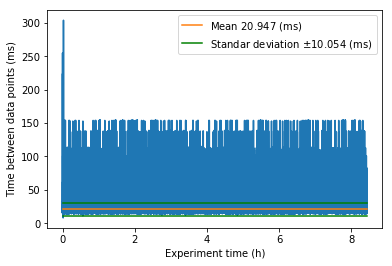

In [4]:
fig, ax = plt.subplots()
c = 'green'
ax.plot(time_hour[1:], diff)
ax.plot(x_mean, y_mean, label = 'Mean $%.3f$ (ms)'%mean)
ax.plot(x_mean, y_mean - std, color = c, label = 'Standar deviation $\pm %.3f$ (ms)'%std)
ax.plot(x_mean, y_mean + std, color = c)

ax.set_ylabel('Time between data points (ms)')
ax.set_xlabel('Experiment time (h)')
plt.legend()
plt.show()

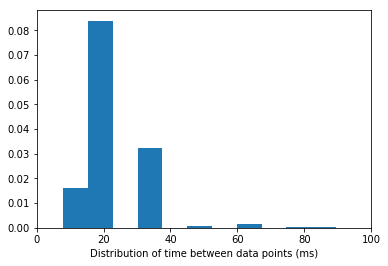

In [5]:
plt.hist(diff, bins = 40, normed = True)
plt.xlim(0, 100)
plt.xlabel('Distribution of time between data points (ms)')
plt.show()

# RAM usage

In [6]:
time = ram[:,0].astype(int)
time = time/3600

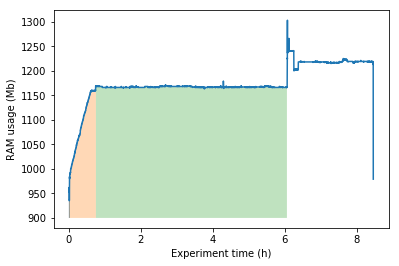

In [7]:
from_ = 900
a = 0.3

software_region = time < 0.02
fill_region = time < 0.75
stability_region = (0.75 < time) & (time < 6.06)

fig, ax = plt.subplots()

ax.plot(time, ram[:, 2])
ax.fill_between(time[software_region], from_, ram[:, 2][software_region])
ax.fill_between(time[fill_region], from_, ram[:,2][fill_region], alpha = a)
ax.fill_between(time[stability_region], from_, ram[:,2][stability_region], alpha = a)
ax.set_ylabel('RAM usage (Mb)')
ax.set_xlabel('Experiment time (h)')
plt.show()

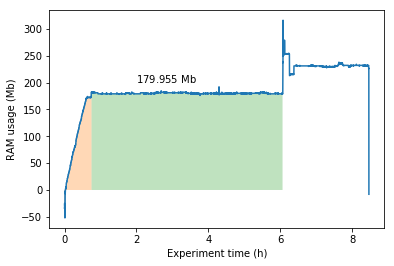

In [8]:
software_initial = 987
used = ram[:, 2] - software_initial

fig, ax = plt.subplots()

mean_stability = np.mean(used[stability_region])
ax.plot(time, used)
ax.fill_between(time[software_region], 0, used[software_region])
ax.fill_between(time[fill_region], 0, used[fill_region], alpha = a)
ax.fill_between(time[stability_region], 0, used[stability_region], alpha = a)

ax.text(2, mean_stability + 20, '$%.3f$ Mb'%mean_stability)
ax.set_ylabel('RAM usage (Mb)')
ax.set_xlabel('Experiment time (h)')
plt.show()